In [1]:
import pandas as pd
import datetime as dt
import pickle
import matplotlib.pyplot as plt

import src.utils.returns_preprocessing as preproc
import src.pca.eigen_portfolios_functions as eg_functions

import os

import logging
logging.getLogger('tensorflow').disabled = True

# 1. Main experiements results

In [2]:
result_index_files = []
base_path = './results/results_to_work/'
for filename in os.listdir(base_path):
    if 'experiment' in filename:
        result_index_files.append(base_path+filename)

In [3]:
result_index_files

['./results/results_to_work/experiment_results_bottom_5.pickle',
 './results/results_to_work/experiment_results_bottom_25.pickle',
 './results/results_to_work/experiment_results_bottom_15.pickle',
 './results/results_to_work/experiment_results_bottom_10.pickle',
 './results/results_to_work/experiment_results_bottom_20.pickle']

In [4]:
with open('./results/results_to_work/experiment_results_bottom_5.pickle', 'rb') as infile:
    index_results_10 =  pickle.load(infile)

2023-04-17 19:15:48.052206: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 19:15:52.072758: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# indexes
months = {'jan':'01', 'abr':'04','jul':'07', 'out':'10'}
years = ['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']

keys_index = []
for year in years:
    for month in months.values():
        keys_index.append(year+'-'+month)




### 1. Plot PSR for test sets

In [7]:
index_results_10

{'2018-07': {11: {'calibration_model': <keras.engine.functional.Functional at 0x7fd132149ac0>,
   'train_results': {'portfolio_log_returns_pred': 0      0.006418
    1     -0.001664
    2     -0.002509
    3      0.005664
    4     -0.010588
             ...   
    198   -0.016128
    199   -0.013418
    200    0.013335
    201   -0.033361
    202   -0.009104
    Length: 203, dtype: float64,
    'y_log_train': array([-4.47785829e-03, -1.37973200e-02,  2.62645897e-03, -3.65666622e-03,
            1.22339972e-02,  1.72162643e-03,  3.57167801e-03,  2.91398348e-04,
            1.76756962e-02,  2.99264602e-03,  5.77391032e-03, -1.67383771e-02,
            6.29731298e-04,  7.22961120e-03, -3.33867880e-02,  1.51622778e-02,
            1.10309761e-02,  3.94872684e-03, -1.24963692e-02,  4.37937839e-03,
           -1.20687876e-02, -1.21039294e-02, -7.38156836e-03,  2.77517083e-03,
           -4.67667166e-03,  9.70589318e-03, -1.18680891e-02, -7.61134146e-03,
            8.58908042e-03, -1.400796

In [11]:
# 1. INDEX bottom 10

# first factor
psr_diff = []
for k,v in index_results_10.items():
    psr_diff.append(v[14]['test_results']['TEST_PSR'] - v[14]['test_results']['TREST_PSR_REFERENCE'])

# temporal view
temporal_psr = []
for key in keys_index:
    if key in index_results_10:
        temporal_psr.append((key,index_results_10[key][14]['test_results']['TREST_PSR_REFERENCE'], index_results_10[key][14]['test_results']['TEST_PSR']))
    else:
        temporal_psr.append((key, 0, 0))
temporal_psr = pd.DataFrame(temporal_psr, columns=['date', 'PSR_REFERENCE', 'PSR_PREDICTED'])
temporal_psr['diff'] = temporal_psr['PSR_PREDICTED'] - temporal_psr['PSR_REFERENCE']
temporal_psr.index = temporal_psr['date']


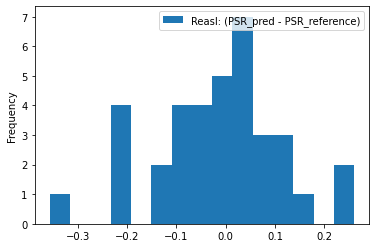

<AxesSubplot:xlabel='date'>

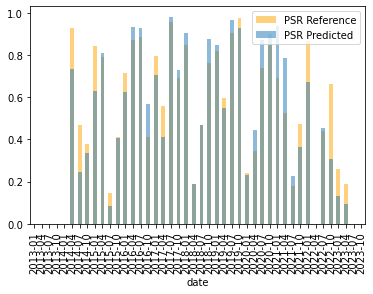

In [12]:
# Graphs
# plt.new figure
plot_hist(pd.Series(psr_diff), label='Reasl: (PSR_pred - PSR_reference)', legend = True, bins = 15)
# comparing PSR
# plt.new figure
#plot_multiple_bar([
#    {'s':temporal_psr['PSR_REFERENCE'], 'kwargs':{'legend': True, 'label': "PSR Reference", 'alpha': 0.5, 'color': 'orange'}},
#    {'s':temporal_psr['PSR_PREDICTED'], 'kwargs':{'legend': True, 'label': "PSR Predicted", 'alpha': 0.5}}
#])
temporal_psr['PSR_REFERENCE'].plot.bar(legend = True, label = "PSR Reference", alpha = 0.5, color = 'orange')
temporal_psr['PSR_PREDICTED'].plot.bar(legend = True, label = "PSR Predicted", alpha = 0.5)

# times where predicted was higher than reference
# plot new figure



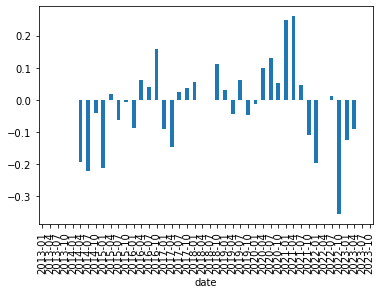

In [10]:
plot_bar(temporal_psr['diff'], label = '', legend =True)

In [6]:
# other methods

def plot(s, **kwargs):
    s.plot(**kwargs)
    plt.show()
    
def plot_hist(s, **kwargs):
    s.plot.hist(**kwargs)
    plt.show()
    
def plot_bar(s, **kwargs):
    s.plot.bar(**kwargs)
    plt.show()

def plot_multiple_bar(bars):
    for bar in bars: 
        bar['s'].plot.bar(**bars['kwargs']) ##kwargs are a problem
    plt.show()

###
def plot_cummulative_returns(factor_iteration):
    ((pd.Series(preproc.log_to_simple_returns(factor_iteration['train_results']['portfolio_log_returns_pred'])) + 1).cumprod() - 1).plot(label='predicted', legend = True)
    ((pd.Series(preproc.log_to_simple_returns(factor_iteration['train_results']['y_log_ammended'])) + 1).cumprod() - 1).plot(label='Target', legend = True)
    ((pd.Series(preproc.log_to_simple_returns(factor_iteration['train_results']['y_log_train'])) + 1).cumprod() -1).plot(label='Original', legend = True)
    plt.show()
    
# other methods
def plot_cummulative_test_returns(factor_iteration):
    ((pd.Series((factor_iteration['test_results']['y_predicted'].values)) + 1).cumprod() - 1).plot(label='predicted', legend = True)
    ((pd.Series((factor_iteration['test_results']['y_target'].values)) + 1).cumprod() -1).plot(label='Original', legend = True)
    plt.show()